In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("bmh")
%matplotlib inline

**1. Capacity**

In [2]:
off = pypsa.Network("elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc")

n1 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc")
n5_3 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.7.nc")
n5_11 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc")
n25 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc")
n50 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-off.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-

1.1 Plotting the power capacity

In [3]:
# power capacity DataFrame without MDES
gen_off = off.generators.groupby("carrier").p_nom_opt.sum()
sto_u_off = off.storage_units.groupby("carrier").p_nom_opt.sum()
sto_off = off.links.loc[~(off.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
off_cap = pd.concat([gen_off, sto_u_off, sto_off], axis=0)
off_cap = off_cap.rename("without MDES")

# power capacity DataFrame with MDES in 1€/kWh,300€/kW
gen_cap1 = n1.generators.groupby("carrier").p_nom_opt.sum()
sto_u1 = n1.storage_units.groupby("carrier").p_nom_opt.sum()
sto1 = n1.links.loc[~(n1.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap1 = pd.concat([gen_cap1, sto_u1, sto1], axis=0)
max_cap1.rename("MDES in 1€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 5€/kWh,300€/kW
gen_cap5_3 = n5_3.generators.groupby("carrier").p_nom_opt.sum()
sto_u5_3 = n5_3.storage_units.groupby("carrier").p_nom_opt.sum()
sto5_3 = n5_3.links.loc[~(n5_3.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap5_3 = pd.concat([gen_cap5_3, sto_u5_3, sto5_3], axis=0)
max_cap5_3.rename("MDES in 5€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 5€/kWh,1100€/kW,70%
gen_cap5_11 = n5_11.generators.groupby("carrier").p_nom_opt.sum()
sto_u5_11 = n5_11.storage_units.groupby("carrier").p_nom_opt.sum()
sto5_11 = n5_11.links.loc[~(n5_11.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap5_11 = pd.concat([gen_cap5_11, sto_u5_11, sto5_11], axis=0)
max_cap5_11.rename("MDES in 5€/kWh,1100€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 25€/kWh,300€/kW
gen_cap25 = n25.generators.groupby("carrier").p_nom_opt.sum()
sto_u25 = n25.storage_units.groupby("carrier").p_nom_opt.sum()
sto25 = n25.links.loc[~(n25.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap25 = pd.concat([gen_cap25, sto_u25, sto25], axis=0)
max_cap25.rename("MDES in 25€/kWh,300€/kW,70%", inplace=True)

# power capacity DataFrame with MDES in 50€/kWh,100€/kW
gen_cap50 = n50.generators.groupby("carrier").p_nom_opt.sum()
sto_u50 = n50.storage_units.groupby("carrier").p_nom_opt.sum()
sto50 = n50.links.loc[~(n50.links.carrier == "DC")].groupby("carrier").p_nom_opt.sum()
max_cap50 = pd.concat([gen_cap50, sto_u50, sto50], axis=0)
max_cap50.rename("MDES in 50€/kWh,100€/kW,80%", inplace=True)


carrier
biomass               1.358976e+04
geothermal            7.660000e+02
nuclear               1.000379e+05
offwind-ac            1.120506e+04
offwind-dc            1.670930e+04
onwind                4.882380e+05
ror                   4.252265e+04
solar                 1.086241e+06
PHS                   3.192695e+04
hydro                 7.774317e+04
H2 electrolysis       9.620959e+04
H2 fuel cell          1.867660e+05
battery charger       6.892004e+04
battery discharger    7.034122e+04
mdes-charger          2.049363e+05
mdes-discharger       9.663193e+04
Name: MDES in 50€/kWh,100€/kW,80%, dtype: float64

In [4]:
cap = pd.concat([off_cap, max_cap1, max_cap5_3, max_cap5_11, max_cap25, max_cap50], axis=1)
cap.fillna(0, inplace=True)

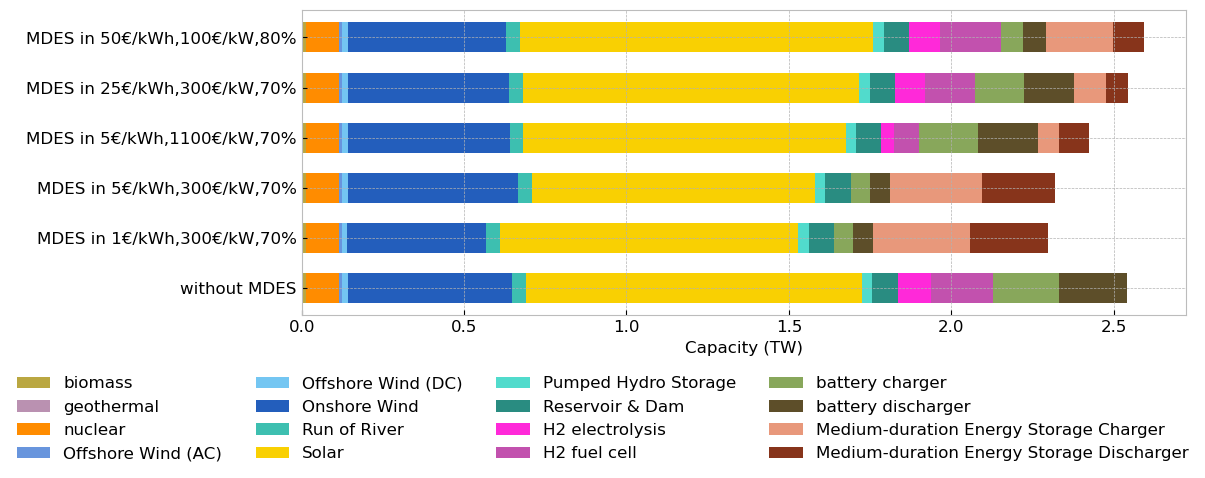

In [5]:
ax = plt.axes()
ax.set_facecolor("white")
cap.T.div(1e6).plot(ax=ax, kind='barh', color=cap.index.map(n1.carriers.color),stacked=True, width=0.6, figsize=(12, 5))
plt.xlabel("Capacity (TW)", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
#plt.title("Optimal power capacity comparison")
plt.legend(labels=cap.index.map(n1.carriers.nice_name),ncol=4,prop={'size':12}, bbox_to_anchor=(1.02, -0.15),frameon=False)
plt.tight_layout()
#plt.savefig('Optimal power capacity comparison.pdf', dpi=750)
plt.show()

1.2 Plotting the storage capacity

In [6]:
c_sto = n1.stores.groupby("carrier").e_nom_opt.sum()
c_sto = c_sto.rename("MDES in 1€/kWh,300€/kW,70%")
c_sto5_3 = n5_3.stores.groupby("carrier").e_nom_opt.sum()
c_sto5_3 = c_sto5_3.rename("MDES in 5€/kWh,300€/kW,70%")
c_sto5_11 = n5_11.stores.groupby("carrier").e_nom_opt.sum()
c_sto5_11 = c_sto5_11.rename("MDES in 5€/kWh,1100€/kW,70%")
c_sto25 = n25.stores.groupby("carrier").e_nom_opt.sum()
c_sto25 = c_sto25.rename("MDES in 25€/kWh,300€/kW,70%")
c_sto50 = n50.stores.groupby("carrier").e_nom_opt.sum()
c_sto50 = c_sto50.rename("MDES in 50€/kWh,100€/kW,80%")

In [7]:
c_sto_off = off.stores.groupby("carrier").e_nom_opt.sum()
c_sto_off.rename("without MDES", inplace=True)

carrier
H2         7.869422e+07
battery    1.245459e+06
Name: without MDES, dtype: float64

In [8]:
stores = pd.concat([c_sto_off,c_sto,c_sto5_3, c_sto5_11, c_sto25, c_sto50], axis=1)

In [9]:
sto_unit = (n1.storage_units.p_nom_opt * n1.storage_units.max_hours).groupby(n1.storage_units.carrier).sum()
sto_unit = sto_unit.rename("MDES in 1€/kWh,300€/kW,70%")
sto_unit5_3 = (n5_3.storage_units.p_nom_opt * n5_3.storage_units.max_hours).groupby(n5_3.storage_units.carrier).sum()
sto_unit5_3 = sto_unit5_3.rename("MDES in 5€/kWh,300€/kW,70%")
sto_unit5_11 = (n5_11.storage_units.p_nom_opt * n5_11.storage_units.max_hours).groupby(n5_11.storage_units.carrier).sum()
sto_unit5_11 = sto_unit5_11.rename("MDES in 5€/kWh,1100€/kW,70%")
sto_unit25 = (n25.storage_units.p_nom_opt * n25.storage_units.max_hours).groupby(n25.storage_units.carrier).sum()
sto_unit25 = sto_unit25.rename("MDES in 25€/kWh,300€/kW,70%")
sto_unit50 = (n50.storage_units.p_nom_opt * n50.storage_units.max_hours).groupby(n50.storage_units.carrier).sum()
sto_unit50 = sto_unit50.rename("MDES in 50€/kWh,100€/kW,80%")

In [10]:
sto_unit_off = (off.storage_units.p_nom_opt * off.storage_units.max_hours).groupby(off.storage_units.carrier).sum()
sto_unit_off = sto_unit_off.rename("without MDES")

In [11]:
storageunit = pd.concat([sto_unit_off, sto_unit, sto_unit5_3, sto_unit5_11, sto_unit25, sto_unit50], axis=1)

In [12]:
storage = pd.concat([stores, storageunit], axis=0)
storage.head()

,without MDES,"MDES in 1€/kWh,300€/kW,70%","MDES in 5€/kWh,300€/kW,70%","MDES in 5€/kWh,1100€/kW,70%","MDES in 25€/kWh,300€/kW,70%","MDES in 50€/kWh,100€/kW,80%"
carrier,,,,,,
H2,7.869422e+07,9.668094e+01,8.705182e+02,4.767895e+07,7.495258e+07,7.978536e+07
battery,1.245459e+06,1.972091e+05,2.243978e+05,9.581364e+05,7.818782e+05,3.855140e+05
MDES,NaN,7.180497e+07,3.657484e+07,1.474096e+07,2.201326e+06,1.237298e+06
PHS,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06,3.013391e+06
hydro,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08,1.793789e+08


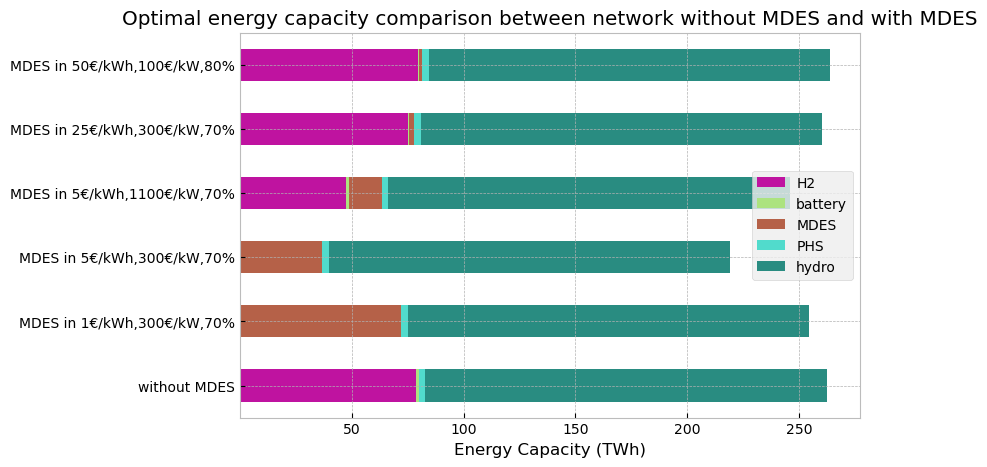

In [13]:
ax = plt.axes()
ax.set_facecolor("white")
storage.T.div(1e6).plot(ax=ax, kind='barh', color=storage.index.map(n1.carriers.color),stacked=True, width=0.5,figsize=(8,5))
plt.xlabel("Energy Capacity (TWh)")
plt.xticks(rotation=0)
plt.title("Optimal energy capacity comparison between network without MDES and with MDES")
plt.legend(loc="best")
plt.show()

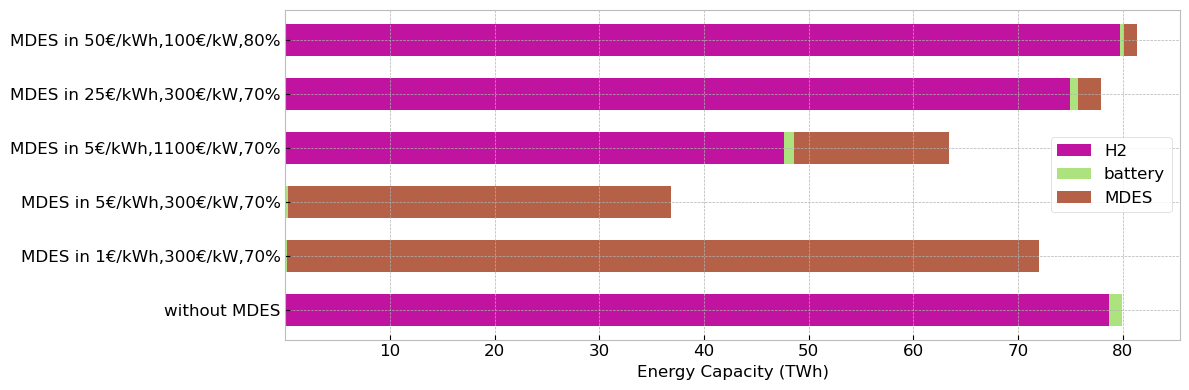

In [14]:
ax = plt.axes()
ax.set_facecolor("white")

storage.iloc[:3,:].T.div(1e6).plot(ax=ax, kind='barh', color=storage.index.map(n1.carriers.color),stacked=True, width=0.6,figsize=(12,4))
plt.xlabel("Energy Capacity (TWh)", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.legend(ncol=1,prop={'size':12},facecolor="white")
#plt.title("Optimal energy capacity comparison")
plt.tight_layout()
#plt.savefig('Optimal energy capacity comparison.pdf')
plt.show()

**2. Duration analysis**

2.1 EP ratio comparison

In [15]:
capacities = pd.read_csv("nodal_capacities.csv",  index_col=2, header = 2)
efficiency = pd.read_csv("efficiency_MDES.csv", index_col=0, header=2)

In [16]:
sto_cap =capacities[(capacities['opt'] == "stores") | (capacities['opt'] == "links")].dropna()

In [17]:
sto_cap.rename(columns={'Unnamed: 1': 'region'}, inplace=True)
sto_cap.drop("opt",axis=1, inplace=True)

In [18]:
sto_cap

,region,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
H2 electrolysis,AL1 0,0.009403,0.010018,0.011630,0.012349,0.014936,0.015480,0.017725,2.883378e-02,0.007716,...,0.023820,0.025274,0.023568,0.015968,0.023588,0.021728,0.022079,0.031323,0.023995,0.018784
H2 fuel cell,AL1 0,0.003654,0.003733,0.004575,0.005221,0.006485,0.007629,0.009321,1.673549e-02,0.002769,...,0.020769,0.022074,0.020128,0.014384,0.021010,0.019182,0.020840,0.027429,0.022117,0.017066
battery charger,AL1 0,1820.681067,2211.032847,2176.343397,2460.368962,2660.869643,2742.231380,2880.188474,2.716735e+03,199.144656,...,2349.972567,2348.782272,2353.056955,2349.877870,2350.232940,2350.152066,2349.773635,2349.621231,2350.252580,2349.236043
battery discharger,AL1 0,1858.224833,2256.625950,2221.221179,2511.103557,2715.738707,2798.778182,2939.580052,2.772756e+03,203.251164,...,2398.430708,2397.215868,2401.578698,2398.334058,2398.696450,2398.613909,2398.227674,2398.072127,2398.716495,2397.678996
mdes-charger,AL1 0,2198.207520,969.370339,74.108907,0.047262,0.016819,0.011388,0.008709,9.662357e-03,2647.469285,...,0.003670,0.003748,0.029838,0.008501,0.009538,0.006616,0.004885,0.006184,0.003955,0.002837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDES,SI1 0,130.681344,46.706270,27.162814,18.959218,18.170754,15.898630,19.001725,2.951192e+01,51759.436643,...,0.024617,0.024082,0.035828,0.019106,0.029731,0.025440,0.022243,0.033489,0.022666,0.018502
battery,SI1 0,1352.712447,1211.699356,2693.756202,4886.264427,4493.999470,3395.568823,2607.873893,1.993902e+03,270.203968,...,1022.099646,1017.679499,1026.119211,1012.979417,1022.171800,1012.249300,1022.550392,1022.262673,1027.427073,1023.729302
H2,SK1 0,3.814774,3.214320,3.569945,3.500910,5.192343,7.948296,11.064868,2.304853e+01,2.852510,...,577214.888417,577019.336801,575701.372054,576375.684619,577191.505840,576472.593887,577241.137212,577425.860250,577238.612579,577519.470238
MDES,SK1 0,90264.393725,71164.344587,110708.962120,194958.339787,265814.076963,500274.551226,786141.859512,1.013896e+06,54280.521147,...,0.025460,0.024847,0.031519,0.018818,0.030487,0.025996,0.022779,0.034392,0.023345,0.019059


In [19]:
store_H2 = sto_cap[sto_cap.index == "H2"].set_index("region")
discharge_H2 = sto_cap[sto_cap.index == "H2 fuel cell"].set_index("region")
store_battery = sto_cap[sto_cap.index == "battery"].set_index("region")
discharge_battery = sto_cap[sto_cap.index == "battery discharger"].set_index("region")

In [20]:
discharge_H2.describe().mean()[discharge_H2.describe().mean()>100].sort_values()

Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.6       532.889692
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3      747.938305
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c1-mdes+e0.5       824.940929
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c9-mdes+e0.8      1532.131587
Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3     1543.954345
                                                  ...     
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c9-mdes+e0.7     8555.076093
Co2L0-2H-EQ0.8c-MDES+c25-mdes+c11-mdes+e0.8    8573.902689
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.7     8650.917998
Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.3     8697.928763
Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8     8906.185822
Length: 235, dtype: float64

In [21]:
off.links.groupby("carrier").efficiency.mean()

carrier
DC                    1.000000
H2 electrolysis       0.750000
H2 fuel cell          0.500000
battery charger       0.979796
battery discharger    0.979796
Name: efficiency, dtype: float64

In [22]:
# EP_ratios for hydrogen calculation

threshold_H2 = 1000 # MW
ratio_H2 = np.where(discharge_H2 >= threshold_H2, store_H2 / discharge_H2, 0)

# converted into dataframe
EP_ratios_H2 = pd.DataFrame(ratio_H2, index=store_H2.index, columns=store_H2.columns)

In [23]:
# EP_ratios for battery calculation

threshold_battery = 2 #MW
ratio_battery = np.where(discharge_battery >= threshold_battery, store_battery / discharge_battery, 0)

# converted into dataframe
EP_ratios_battery = pd.DataFrame(ratio_battery, index=store_battery.index, columns=store_battery.columns)

In [24]:
duration_H2 = EP_ratios_H2*0.500000
duration_battery = EP_ratios_battery*0.979796

In [25]:
H2 = duration_H2.values.flatten()[duration_H2.values.flatten()>0]
battery = duration_battery.values.flatten()[duration_battery.values.flatten()>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



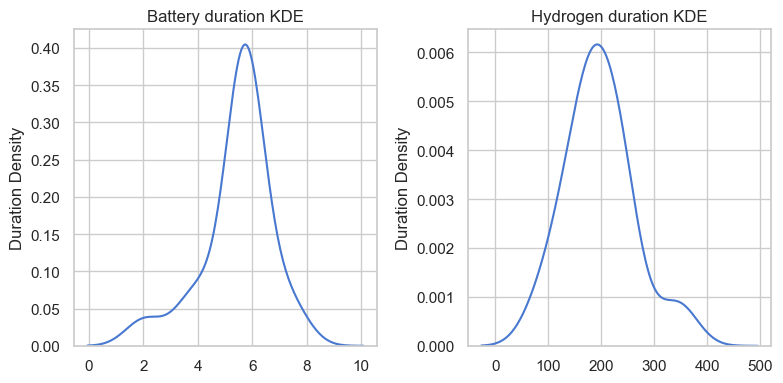

In [26]:
sns.set(style="whitegrid", palette="muted")
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
sns.kdeplot(battery, bw_method=0.55, legend=True, label="Battery", ax=ax1)
ax1.set_title("Battery duration KDE", fontsize=12)
ax1.set_ylabel("Duration Density", fontsize=12)
ax2 = fig.add_subplot(122)
sns.kdeplot(H2, bw_method=0.55, legend=True, label="H2", ax=ax2)
ax2.set_title("Hydrogen duration KDE", fontsize=12)
ax2.set_ylabel("Duration Density", fontsize=12)
plt.tight_layout()
#plt.savefig("KDE for battery and hydrogen.pdf",bbox_inches='tight')
plt.show()

EP ratios for MDES calculation

In [27]:
store_MDES = sto_cap[sto_cap.index == "MDES"].set_index("region")
discharge_MDES = sto_cap[sto_cap.index == "mdes-discharger"].set_index("region")

In [28]:
# EP_ratios calculation

threshold = 50 #MW
ratio = np.where(discharge_MDES >= threshold, store_MDES / discharge_MDES, 0)

# converted into dataframe
EP_ratios = pd.DataFrame(ratio, index=store_MDES.index, columns=store_MDES.columns)

In [29]:
EP_ratios # discharger EP ratios

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,644.798680,737.193173,743.990904,0.000000,0.000000,0.000000,0.000000,0.000000,497.003228,692.962900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BA1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.187073,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BE1 0,274.493109,332.453557,378.779158,362.213510,390.087246,372.631707,348.338857,354.976835,147.967598,596.601771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BG1 0,566.914045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.038433,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH1 0,108.597337,204.728147,231.430579,274.736194,295.493357,300.910231,273.420476,317.962557,118.157939,168.195725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CZ1 0,84.326883,144.980561,145.017269,159.586158,180.650884,188.204696,198.955306,228.882858,99.747163,169.008058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE1 0,347.031626,415.591038,399.836016,410.507746,403.877724,369.233012,314.249054,297.237627,331.891096,409.226678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK1 0,190.782301,319.038343,311.205384,297.545345,317.142271,408.812184,442.413813,392.223466,175.812349,236.812916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Two kinds of EP ratios for the system with largest system value

In [30]:
charge_MDES = sto_cap[sto_cap.index == "mdes-charger"].set_index("region")

In [31]:
# EP_ratios calculation

threshold = 50 #MW
ratio_ch = np.where(charge_MDES >= threshold, store_MDES / charge_MDES, 0)

# converted into dataframe
EP_ratios_ch = pd.DataFrame(ratio_ch, index=store_MDES.index, columns=store_MDES.columns)

In [32]:
# add one column for calssifying the types of EP ratios
EP_ratios_ch["EP ratios"] = 'EP ratios for charger'
EP_ratios["EP ratios"] = 'EP ratios for discharger'

In [33]:
ratio_merged = pd.concat([EP_ratios_ch, EP_ratios])

In [34]:
# convert the data into Series with identifier and the column names represent networks to show the design parameters and costs
df_EP = pd.melt(ratio_merged, id_vars='EP ratios', var_name='Variables', value_name='Energy-to-power ratio')
df_EP.head() # 37*280*2 dots

,EP ratios,Variables,Energy-to-power ratio
0,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,219.009152
1,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,0.000000
2,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,0.000000
3,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,364.007711
4,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,208.816957


In [35]:
ratio_merged.head()

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.5,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8,EP ratios
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,219.009152,406.937506,623.478030,0.000000,0.000000,0.00000,0.000000,0.000000,164.679616,232.164239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
AT1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BA1 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,335.236199,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BE1 0,364.007711,466.726245,976.732476,1143.970738,1284.559982,1532.74319,2025.013022,2421.302605,188.513779,751.636875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger
BG1 0,208.816957,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,124.323181,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EP ratios for charger


In [36]:
df_EP[df_EP["EP ratios"]== 'EP ratios for charger'].sort_values(by = "Energy-to-power ratio", ascending=False)

,EP ratios,Variables,Energy-to-power ratio
2892,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.8,4820.594708
5586,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c7-mdes+e0.8,4679.630384
5660,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c9-mdes+e0.8,4557.047127
2300,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c15-mdes+e0.7,4204.752896
4920,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c5-mdes+c5-mdes+e0.7,3882.292880
...,...,...,...
9507,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9506,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9505,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000
9504,EP ratios for charger,Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.5,0.000000


C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

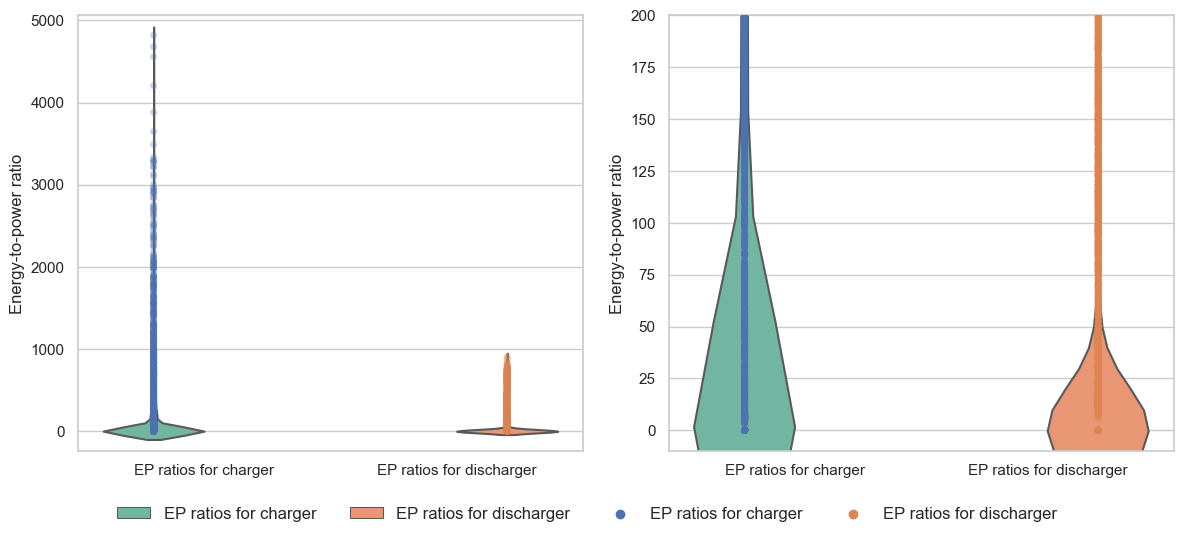

In [37]:
sns.set(style="whitegrid", palette="muted")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# create violin plot
sns.violinplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
               alpha=0.3, ax=ax1, inner=None, palette="Set2")
sns.violinplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
               alpha=0.5, ax=ax2, inner=None, palette="Set2")

# create stripplot
sns.stripplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
              alpha=0.3, ax=ax1, jitter=False, dodge=True, palette="deep")
sns.stripplot(data=df_EP, x='EP ratios', y='Energy-to-power ratio', hue='EP ratios', 
              alpha=0.5, ax=ax2, jitter=False, dodge=True, palette="deep")

# remove the legend and xlabel of subplots
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xlabel('')
ax2.set_xlabel('')

# add one legend
handles1, labels1 = ax1.get_legend_handles_labels()
fig.legend(handles1, labels1, bbox_to_anchor=(0.9, 0.01), ncol=4, fontsize=12, frameon=False)
plt.tight_layout()
plt.ylim(-10,200)
#plt.savefig("Comparison of Optimal Energy to Power Ratios Ranges.pdf", bbox_inches='tight')
plt.show()

2.2 Storage duration analysis

In [38]:
duration_MDES = EP_ratios*efficiency

In [39]:
MDES = duration_MDES.values.flatten()[duration_MDES.values.flatten()>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



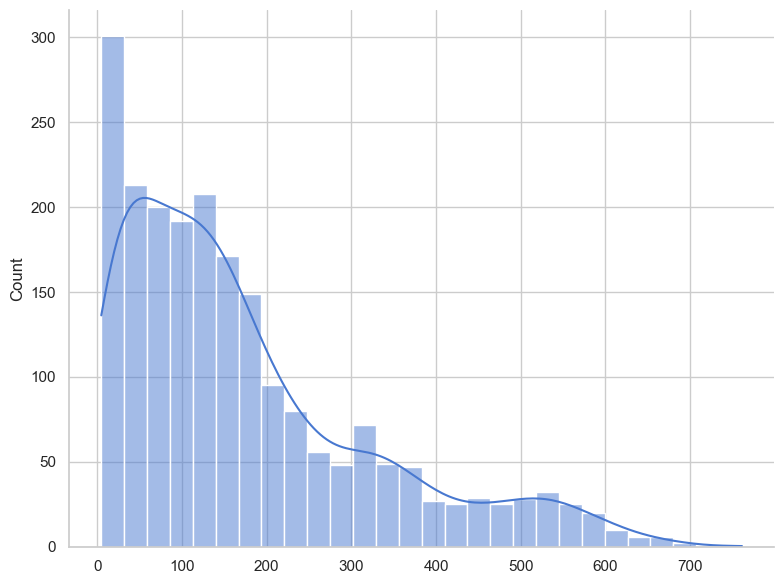

In [40]:
sns.displot(data=MDES, kde=True, height=6, aspect=8/6)
plt.show()

2.2.1 Calculation: average storage durations for 280 cases

In [41]:
time = duration_MDES.replace(0, np.nan)
time.head()

,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.6,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.6,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.8,...,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c7-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c7-mdes+e0.6,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c7-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c9-mdes+e0.5,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c9-mdes+e0.6,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c9-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c75-mdes+c9-mdes+e0.8,EP ratios
region,,,,,,,,,,,,,,,,,,,,,
AL1 0,353.170782,351.434353,287.875466,331.505365,377.954994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA1 0,NaN,103.369870,NaN,35.024554,116.802192,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE1 0,150.346068,104.628892,116.307460,145.330629,194.241753,204.098792,293.334127,388.876833,490.265527,521.158275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG1 0,310.511610,190.946007,66.345133,121.040707,94.760502,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
time = time.mean(axis=0)

In [43]:
time.dropna(inplace=True)

In [44]:
time.rename("Duration (h)", inplace=True)
time = time.to_frame()

In [45]:
time['opt']=time.index

In [46]:
pattern_MDES = r'MDES\+c(\d+)'
pattern_mdes = r'mdes\+c(\d+)'
pattern_mdes_e = r'mdes\+e([0-9.]+)'
time['Energy capacity cost (€/kWh)'] = time.opt.apply(lambda x: int(re.search(pattern_MDES, x).group(1)) if re.search(pattern_MDES, x) else None)
time['Power capacity cost (€/kW)'] = time.opt.apply(lambda x: int(re.search(pattern_mdes, x).group(1))*100 if re.search(pattern_mdes, x) else None)
time['Round-trip efficiency (%)'] = time.opt.apply(lambda x: int(float(re.search(pattern_mdes_e, x).group(1))*100) if re.search(pattern_mdes_e, x) else None)

In [47]:
time = time.reset_index(drop=True)

In [48]:
time.drop("opt",axis='columns', inplace=True)

In [49]:
time["Duration (h)"].all()>0

True

In [50]:
time1 = time.loc[time["Energy capacity cost (€/kWh)"] == 1]
time5 = time.loc[time["Energy capacity cost (€/kWh)"] == 5]
time25 = time.loc[time["Energy capacity cost (€/kWh)"] == 25]
time50 = time.loc[time["Energy capacity cost (€/kWh)"] == 50]

In [51]:
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

In [52]:
#CAES - energy capacity cost[1,10]
x_caes = 300
y_caes = 64
width_caes = 900
height_caes = 9
#PTES - energy capacity cost[4.4,50]
x_ptes = 1100
y_ptes = 37
width_ptes = 1800
height_ptes = 33
#LAES - energy capacity cost[130,580]
x_laes = 600
y_laes = 52
width_laes = 2200
height_laes = 18
#VRB - energy capacity cost[40,260]
x_vrb = 110
y_vrb = 65
width_vrb = 280
height_vrb = 13

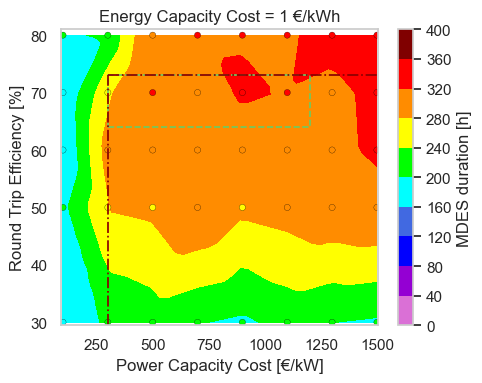

In [53]:
fig, ax = plt.subplots(figsize=(5,4))
# cost reduction
x = time1.iloc[:,2].values
y = time1.iloc[:,3].values
z = time1.iloc[:,0].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='linear')
bins = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0', '40', '80', '120', '160', '200', '240', '280', '320', '360', '400'])
cbar.set_label('MDES duration [h]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
#rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
#ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [€/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 1 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES')]
# Create the legend
#ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.25), frameon=False)
plt.grid(False)
plt.tight_layout()
#plt.savefig('Storage duration for 1 Euro per KWh.png', dpi=750)
plt.show()

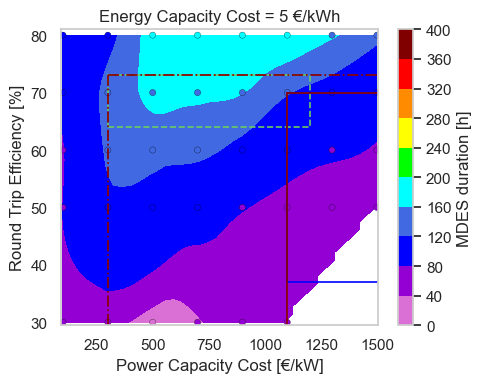

In [54]:
fig, ax = plt.subplots(figsize=(5,4))
# cost reduction
x = time5.iloc[:,2].values
y = time5.iloc[:,3].values
z = time5.iloc[:,0].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0', '40', '80', '120', '160', '200', '240', '280', '320', '360', '400'])
cbar.set_label('MDES duration [h]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [€/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 5 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)
# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
#ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.35), frameon=False)
plt.grid(False)
plt.tight_layout()
#plt.savefig('Storage duration for 5 Euro per KWh.png', dpi=750)
plt.show()

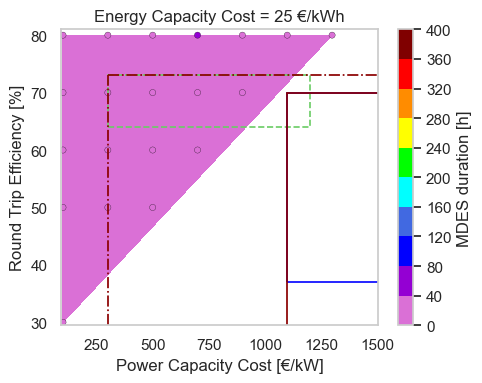

In [55]:
fig, ax = plt.subplots(figsize=(5,4))
# cost reduction
x = time25.iloc[:,2].values
y = time25.iloc[:,3].values
z = time25.iloc[:,0].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='cubic')
bins = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0', '40', '80', '120', '160', '200', '240', '280', '320', '360', '400'])
cbar.set_label('MDES duration [h]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)

ax.set_xlabel('Power Capacity Cost [€/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 25 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)
# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
#ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.35), frameon=False)
plt.grid(False)
plt.tight_layout()
#plt.savefig('Storage duration for 25 Euro per KWh.png', dpi=750)
plt.show()

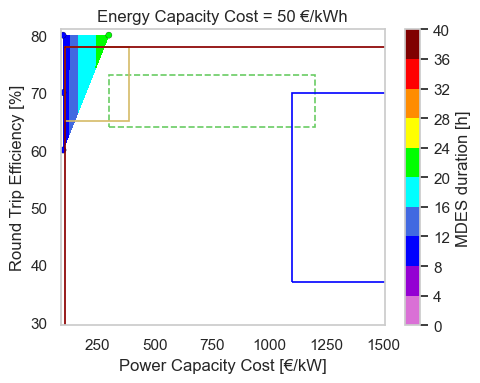

In [56]:
fig, ax = plt.subplots(figsize=(5,4))
# cost reduction
x = time50.iloc[:,2].values
y = time50.iloc[:,3].values
z = time50.iloc[:,0].values
xi=np.linspace(min(x),max(x),len(z))
yi=np.linspace(min(y),max(y),len(z))
xi,yi=np.meshgrid(xi,yi)
zi=griddata((x,y),z, (xi,yi), method='linear')
bins = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
cmap = mcolors.ListedColormap(['#DA70D6', '#9400D3', '#0000FF', '#4169E1', '#00FFFF', '#00FF00', '#FFFF00', '#FF8c00', '#FF0000', '#800000'])
norm = mcolors.BoundaryNorm(bins, cmap.N)
contour = ax.contourf(xi,yi,zi,5,alpha =1, cmap = cmap, norm=norm)
scatter = ax.scatter(
    x, y, c=z,s=20,edgecolors='black',linewidths=0.2,
    cmap=cmap, norm=norm
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(bins) 
cbar.set_ticklabels(['0', '4', '8', '12', '16', '20', '24', '28', '32', '36', '40'])
cbar.set_label('MDES duration [h]',loc='center',rotation=90)

# design space 
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1.2,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_vrb)

ax.set_xlabel('Power Capacity Cost [€/kW]')
ax.set_ylabel('Round Trip Efficiency [%]')
ax.set_title('Energy Capacity Cost = 50 €/kWh')
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plt.axvline(x=x_vrb, ymin=0, ymax=1/(y_max-y_min)*(y_vrb+height_vrb-y_min), ls="-", c="darkred", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/(x_max-x_min)*(x_vrb-x_min), ls="-", c="darkred", linewidth=1.25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='y', linewidth=1.2, linestyle='-', label='VRB'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
#ax.legend(handles=legend_elements,ncol=2,loc='lower center', bbox_to_anchor=(0.55, -0.35), frameon=False)
plt.grid(False)
plt.tight_layout()
#plt.savefig('Storage duration for 50 Euro per KWh.png', dpi=750)
plt.show()

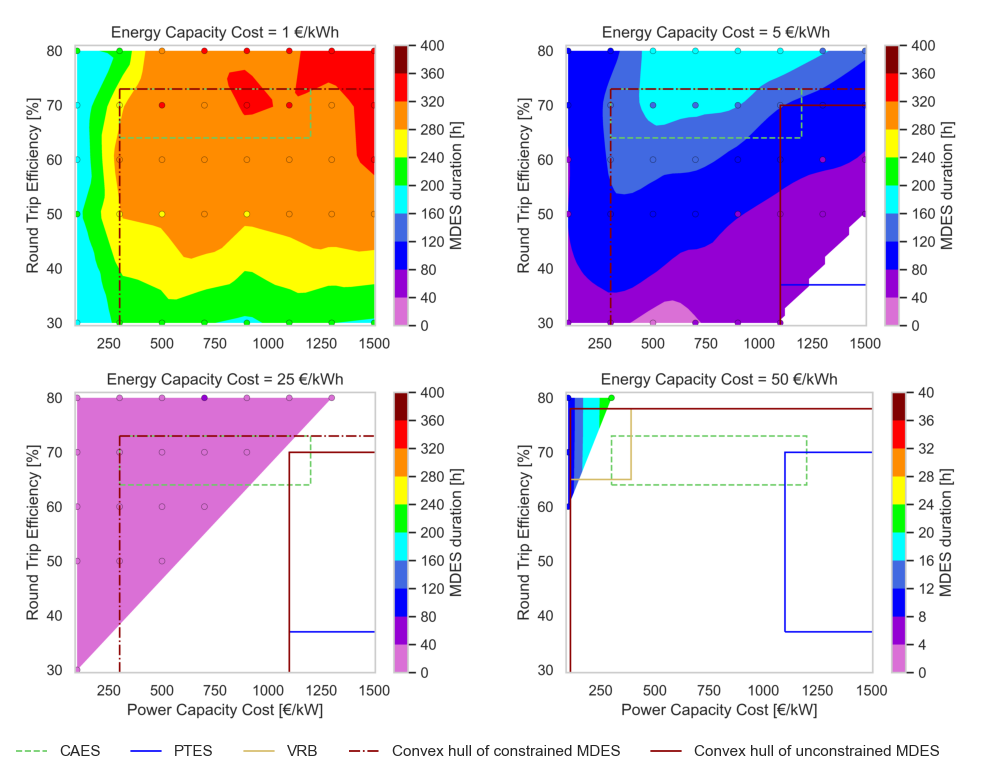

In [57]:
import matplotlib.image as mpimg

image_paths = ['Storage duration for 1 Euro per KWh.png', 'Storage duration for 5 Euro per KWh.png', 
               'Storage duration for 25 Euro per KWh.png', 'Storage duration for 50 Euro per KWh.png']

fig, axs = plt.subplots(2, 2, figsize=(10,10))
for ax, img_path in zip(axs.ravel(), image_paths):
    img = mpimg.imread(img_path) 
    ax.imshow(img) 
    ax.axis('off') 

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='y', linewidth=1.2, linestyle='-', label='VRB'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
    
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
# Create the legend
ax.legend(handles=legend_elements,ncol=5,loc='lower center', bbox_to_anchor=(-0.05, -0.1), frameon=False)
#plt.savefig('MDES_duration_heatmap.pdf', dpi=750, bbox_inches="tight")
plt.show()

2.2.2 Storage duration ranges across 37 European regions

In [58]:
scatter_MDES=pd.DataFrame()
for i in np.arange(280):
    opt=duration_MDES.columns
    df=duration_MDES.iloc[:,i].to_frame()
    df['opts']=[opt[i]]*len(df)
    pattern_MDES = r'MDES\+c(\d+)'
    pattern_mdes = r'mdes\+c(\d+)'
    pattern_mdes_e = r'mdes\+e([0-9.]+)'
    df['Energy capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_MDES, x).group(1)) if re.search(pattern_MDES, x) else None)
    df['Power capacity cost'] = df.opts.apply(lambda x: int(re.search(pattern_mdes, x).group(1))*100 if re.search(pattern_mdes, x) else None)
    df['Round-trip efficiency'] = df.opts.apply(lambda x: int(float(re.search(pattern_mdes_e, x).group(1))*100) if re.search(pattern_mdes_e, x) else None)
    df.drop("opts",axis='columns', inplace=True)
    df.rename(columns={opt[i]:'duration [h]'}, inplace=True)
    scatter_MDES = pd.concat([scatter_MDES, df], axis=0)

In [59]:
scatter_MDES.head()

,duration [h],Energy capacity cost,Power capacity cost,Round-trip efficiency
region,,,,
AL1 0,353.170782,1,100,30
AT1 0,0.000000,1,100,30
BA1 0,0.000000,1,100,30
BE1 0,150.346068,1,100,30
BG1 0,310.511610,1,100,30


In [60]:
dot = scatter_MDES[scatter_MDES["duration [h]"]>0]

In [61]:
dot['region']=dot.index

C:\Users\Joanna\AppData\Local\Temp\ipykernel_32340\3770855909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
dot = dot.reset_index(drop=True)

In [63]:
dot

,duration [h],Energy capacity cost,Power capacity cost,Round-trip efficiency,region
0,353.170782,1,100,30,AL1 0
1,150.346068,1,100,30,BE1 0
2,310.511610,1,100,30,BG1 0
3,59.481211,1,100,30,CH1 0
4,46.187736,1,100,30,CZ1 0
...,...,...,...,...,...
2112,10.905187,50,100,80,PL1 0
2113,10.982512,50,100,80,PT1 0
2114,12.521062,50,100,80,RS1 0
2115,6.552474,50,100,80,SE2 0


In [64]:
dot.groupby("region")["duration [h]"].mean()

region
AL1 0    225.760486
BA1 0     44.307490
BE1 0    265.967507
BG1 0     60.849033
CH1 0    122.893387
CZ1 0    118.186652
DE1 0    210.227313
DK1 0    135.204151
DK2 0    138.557547
EE6 0     98.020330
ES1 0    254.586403
ES4 0    235.658953
FI2 0     67.001741
FR1 0    305.977121
GB0 0    183.507181
GB5 0    191.589462
GR1 0    226.582064
HU1 0    130.958077
IE5 0    168.789849
IT1 0    351.298866
IT3 0    211.369052
LT6 0    155.320258
LU1 0    167.636146
LV6 0    159.623591
ME1 0    173.203318
MK1 0    254.427316
NL1 0    156.068631
NO2 0     67.268932
PL1 0    141.076045
PT1 0    297.112550
RO1 0     44.915948
RS1 0    161.607027
SE2 0     74.190220
SI1 0     83.542953
SK1 0     72.536443
Name: duration [h], dtype: float64

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



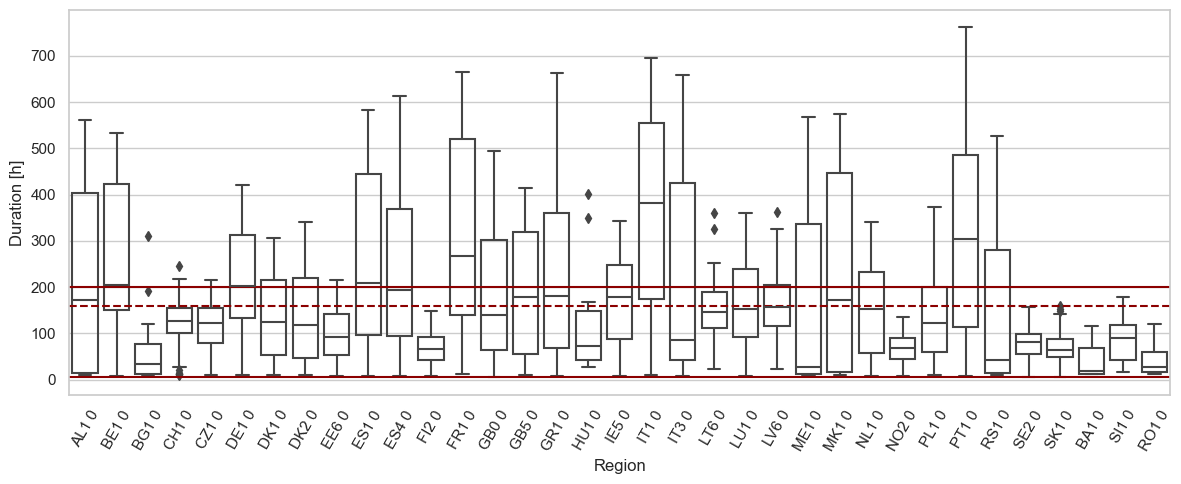

In [65]:
plt.figure(figsize=(12,5))
sns.boxplot(x="region", y="duration [h]", data=dot,boxprops={'facecolor': 'none'})
plt.axhline(y=6, ls="-", c="darkred", linewidth=1.5)
plt.axhline(y=160, ls="--", c="darkred", linewidth=1.5)
plt.axhline(y=200, ls="-", c="darkred", linewidth=1.5)
plt.xticks(rotation=60, fontsize=11)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Duration [h]', fontsize=12)
plt.tight_layout()
#plt.savefig("Regional MDES duration.pdf", dpi=750)
plt.show()

In [66]:
p100 = scatter_MDES[scatter_MDES["Power capacity cost"]==100]
p100 = p100[p100['duration [h]']>0]

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_ca

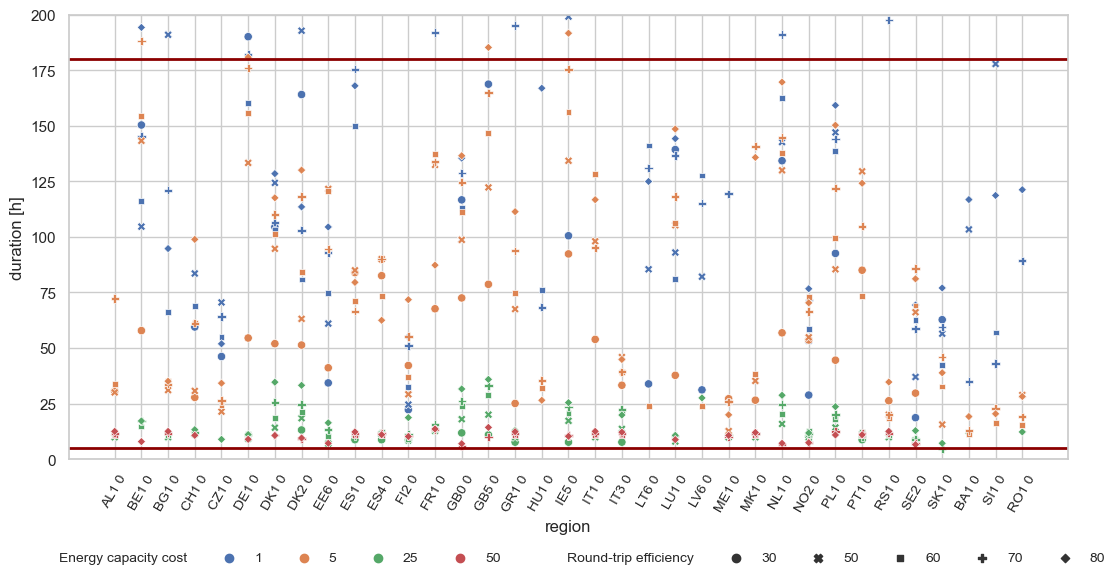

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='region', y='duration [h]', hue='Energy capacity cost', data=p100, palette="deep", style='Round-trip efficiency')
plt.axhline(y=5, ls="-", c="darkred", linewidth=2)
plt.axhline(y=180, ls="-", c="darkred", linewidth=2)
plt.xticks(rotation=60, fontsize=10)
plt.legend(ncol=11, prop={'size':10},bbox_to_anchor=(1.05, -0.18), labelspacing=0.05, frameon=False)
#plt.title("Power capacity cost = 100€/kW")
plt.ylim(0,200)
plt.tight_layout()
#plt.savefig("duration at 100.pdf", dpi=750)
plt.show()

In [68]:
d_coefficent = np.around(scatter_MDES.corr(method='pearson'), decimals=2)
d_coefficent # correlation between parameters and duration

,duration [h],Energy capacity cost,Power capacity cost,Round-trip efficiency
duration [h],1.00,-0.4,-0.03,0.09
Energy capacity cost,-0.40,1.0,0.00,-0.00
Power capacity cost,-0.03,0.0,1.00,-0.00
Round-trip efficiency,0.09,-0.0,-0.00,1.00


In [69]:
d_coefficent.to_csv("Pearson correlation coefficients of MDES duration.csv")

The charging energy is not necessarily equal to discharge energy. It is clear that the charging process need to cost longer time than discharging process.